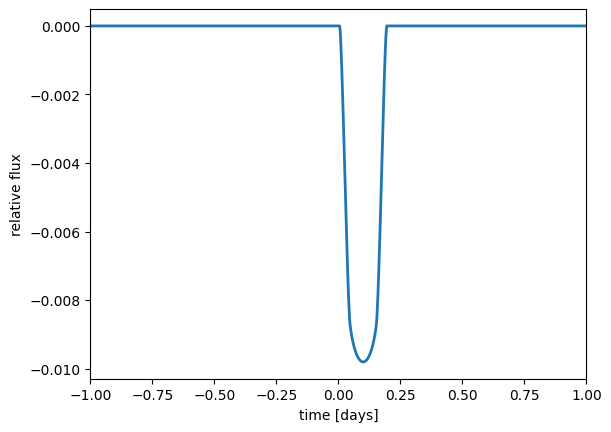

In [93]:
from jaxoplanet.light_curves import LimbDarkLightCurve
from jaxoplanet import orbits
from jax import jit
import jax.numpy as jnp
import matplotlib.pyplot as plt

# Fiducial planet parameters:
params = {
    "period": 35.25,  # period in days
    "radius": 0.1,
    "inclination": jnp.deg2rad(89),
    "time_transit": 0.1,
    "u": jnp.array([0.3, 0.2]),
}

t = jnp.linspace(-1, 1, 1000)


@jit
def calculate_lightcurve(t, params):
    # The light curve calculation requires an orbit
    orbit = orbits.keplerian.Body(
        period=params["period"],
        radius=params["radius"],
        inclination=params["inclination"],
        time_transit=params["time_transit"],
    )

    lc = LimbDarkLightCurve(params["u"]).light_curve(orbit, t=t)
    return lc


lc = calculate_lightcurve(t, params)
plt.plot(t, lc, color="C0", lw=2)
plt.ylabel("relative flux")
plt.xlabel("time [days]")
_ = plt.xlim(t.min(), t.max())

In [67]:
orbit.radius

In [ ]:
jnp.rad